# Introduction:
- This is a data set used to predict heart disease. Patients were classified as having or not having heart disease based on cardiac catheterization, the gold standard. If they had more than 50% narrowing of a coronary artery they were labeled as having heart disease.
- In this cohort, there are 270 patients and there are 13 independent predictive variables or column attributes. 
- After this dataset became available, the UCI data repository made another cohort available with 303 patients. They shared this with Kaggle which is a data competition initiative. First, the file format is .data which is uncommonly used. Secondly, the outcome was reversed by accident. This is why we are still using the older cohort of patients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading heart.csv data
heart_data= pd.read_csv("Heart.csv")

In [3]:
#print of top 5 rows of data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#print of last 5 rows of data
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#shape of the dataset
heart_data.shape

(303, 14)

In [6]:
#print info of dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#some of statistical measures of dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

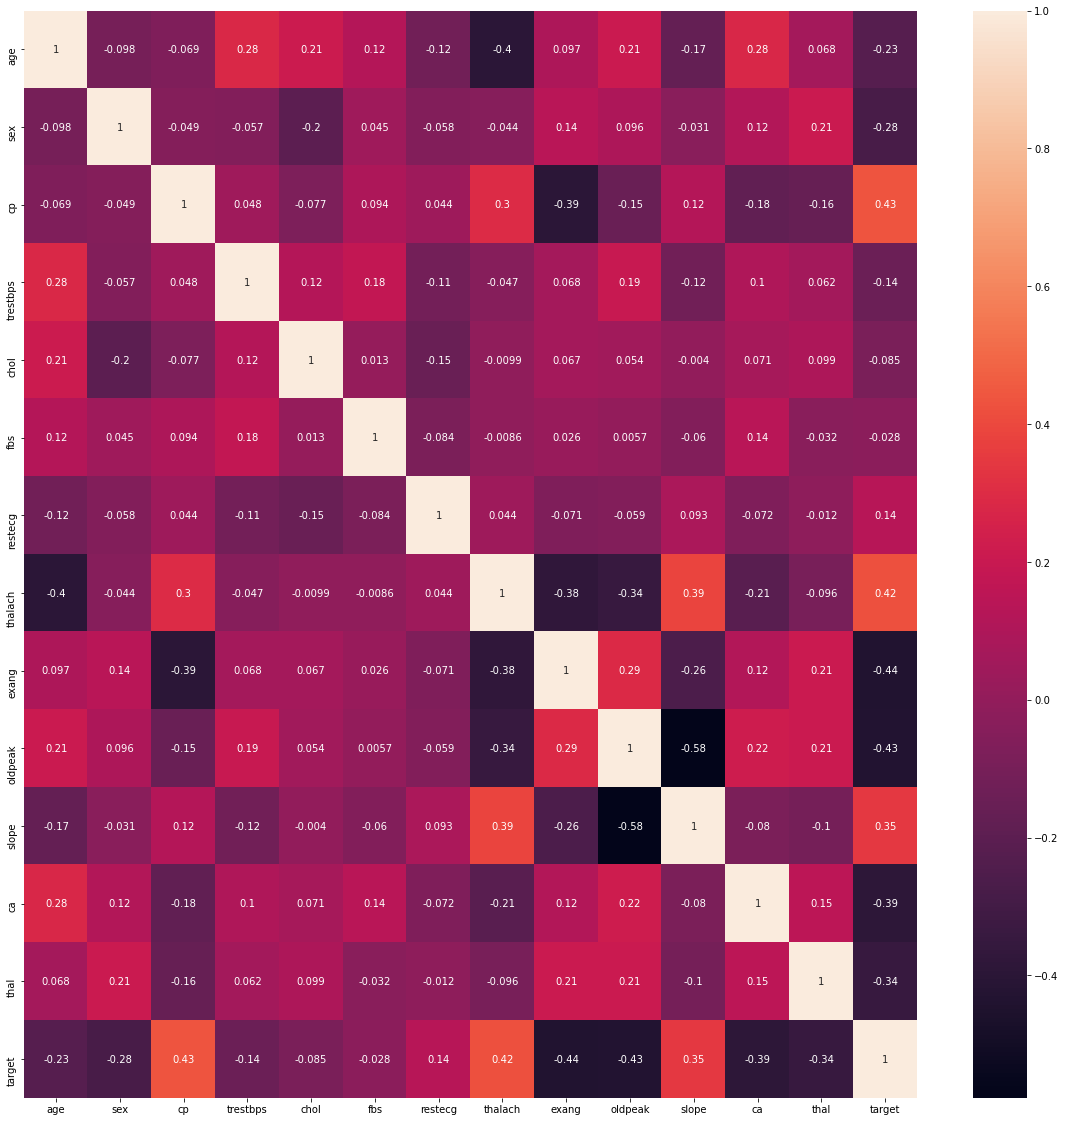

In [9]:
#heatmap
corr_matric = heart_data.corr()
top_corr_features = corr_matric.index
plt.figure(figsize=(20,20))
sns.heatmap(heart_data[top_corr_features].corr(),annot=True)

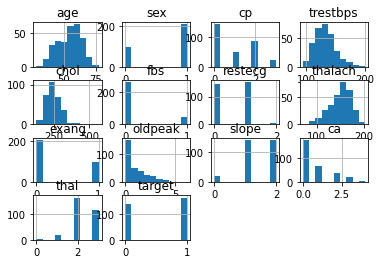

In [10]:
#visualizing the frequency 
heart_data.hist()
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

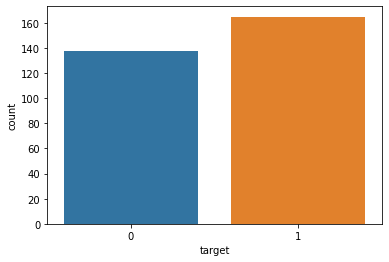

In [11]:
# count plot of target column
sns.countplot(x="target",data=heart_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

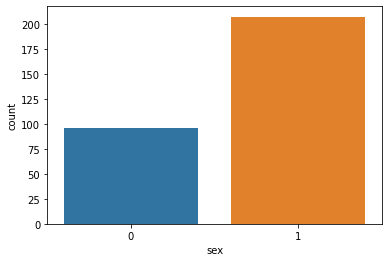

In [23]:
sns.countplot(x="sex",data=heart_data)

<AxesSubplot:xlabel='cp', ylabel='count'>

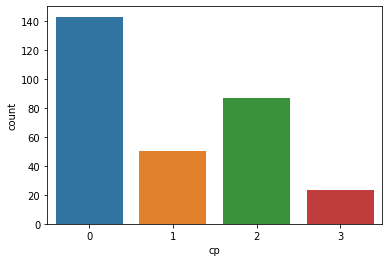

In [24]:
sns.countplot(x="cp",data=heart_data)

<AxesSubplot:xlabel='trestbps', ylabel='count'>

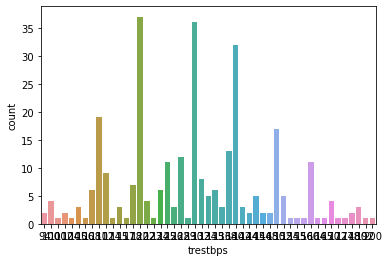

In [25]:
sns.countplot(x="trestbps",data=heart_data)

<AxesSubplot:xlabel='exang', ylabel='count'>

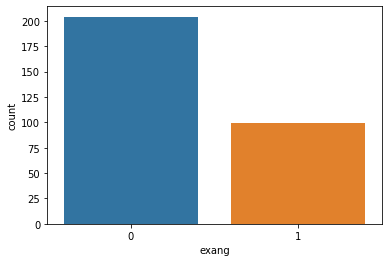

In [26]:
sns.countplot(x="exang",data=heart_data)

<AxesSubplot:xlabel='thal', ylabel='count'>

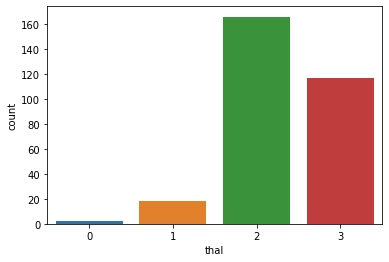

In [27]:
sns.countplot(x="thal",data=heart_data)

<AxesSubplot:xlabel='fbs', ylabel='count'>

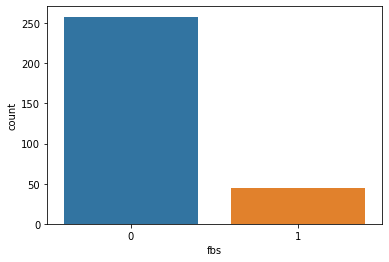

In [28]:
sns.countplot(x="fbs",data=heart_data)

In [29]:
heart_data.target.value_counts()
# when target is 1 it means the person has a chance of heart attack 
# when target is 0 it means the person might not have a heart attack

1    165
0    138
Name: target, dtype: int64

In [13]:
# splitting of dataset 
x= heart_data.drop(columns="target", axis=1)
y= heart_data["target"]

In [14]:
# splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=2)

In [15]:
#model training
#logistic regression
model=LogisticRegression()

In [16]:
#training the model using train data
model.fit(x_train,y_train)

C:\Users\deept\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#accuracy score on train data
x_train_prediction =model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [18]:
print("accuracy score for training data : ",training_data_accuracy)

accuracy score for training data :  0.8512396694214877


In [19]:
#accuracy score on test data
x_test_prediction =model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [20]:
print("accuracy score for test data : ",test_data_accuracy)

accuracy score for test data :  0.819672131147541


KNN:
- The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [21]:
scores = {}
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
scores['Knn'] = np.mean(cv_scores)
print(f"KNN SCORE : {np.mean(cv_scores)}")

KNN SCORE : 0.614207650273224


Random forest regressor:

- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [22]:
rfc = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(rfc, x, y, cv=5)
scores['RandomForest'] = np.mean(cv_scores)
print(f"Random Forest Score : {np.mean(cv_scores)}")

Random Forest Score : 0.8381967213114756


Hence, the accuracy of logistic regression is more, this model is used to build the model.